# ***Install all Modules*** 

In [ ]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


In [ ]:
import anvil.server
anvil.server.connect("UYWSCE3FDS2DJGED34BSAD5M-N3TE4MH6NARGLI6W")

# ***Authenticate Googledrive for CSV file***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

wb = gc.open_by_key('1S0hGk_s80zV2WJnVrtPf8tJxoBJJmLKCGZEMcupsNLY') #.sheet1
ws = wb.worksheet('iot')

# get_all_values gives a list of rows.
values = ws.get_all_values()
#print(values)

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(values)

#df = pd.read_excel('/content/drive/MyDrive/IOTESP.gsheet')#('/content/drive/MyDrive/Colab Notebooks/User_data.xlsx')
df.head()

,0,1,2,3,4,5,6
0,S.No.,Date,Time,Temperature (°C),,Humidity (%),
1,1,10/12/2021,4:46:21 PM,26,°C,66,%
2,2,10/12/2021,4:46:30 PM,26,°C,66,%
3,3,10/12/2021,4:46:58 PM,26,°C,66,%
4,4,10/12/2021,4:47:04 PM,26,°C,65,%


# ***Transform data for Learning***

In [ ]:
df.drop([4,6],axis=1,inplace=True)


In [ ]:
header_row = 0
df.columns = df.iloc[header_row]
df = df.drop(header_row)
df = df.reset_index(drop=True)
df.head()

,S.No.,Date,Time,Temperature (°C),Humidity (%)
0,1,10/12/2021,4:46:21 PM,26,66
1,2,10/12/2021,4:46:30 PM,26,66
2,3,10/12/2021,4:46:58 PM,26,66
3,4,10/12/2021,4:47:04 PM,26,65
4,5,10/12/2021,4:47:08 PM,26,65


In [ ]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
df = df.dropna(how='any',axis=0)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5295 entries, 0 to 5294
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   S.No.             5295 non-null   object
 1   Date              5295 non-null   object
 2   Time              5295 non-null   object
 3   Temperature (°C)  5295 non-null   object
 4   Humidity (%)      5295 non-null   object
dtypes: object(5)
memory usage: 248.2+ KB


In [ ]:
df.describe()

,S.No.,Date,Time,Temperature (°C),Humidity (%)
count,5295,5295,5295,5295,5295
unique,5295,4,5280,16,45
top,492,2021-10-12,2:09:57 AM,15,98
freq,1,4775,7,2132,1221


In [ ]:
# df.set_index(df['Date'],inplace=True)

In [ ]:
# df.drop('Date',axis=1,inplace=True)

In [ ]:
df.head()


,S.No.,Date,Time,Temperature (°C),Humidity (%)
0,1,2021-10-12,4:46:21 PM,26,66
1,2,2021-10-12,4:46:30 PM,26,66
2,3,2021-10-12,4:46:58 PM,26,66
3,4,2021-10-12,4:47:04 PM,26,65
4,5,2021-10-12,4:47:08 PM,26,65


In [ ]:
df['Temperature (°C)'] = df['Temperature (°C)'].astype(int)
df['Humidity (%)'] = df['Humidity (%)'].astype(int)

## **Plot of the data**

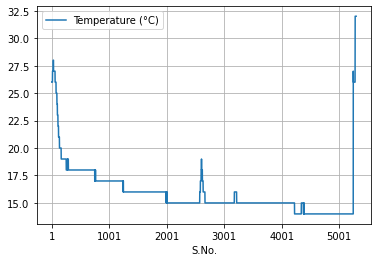

In [ ]:
df.plot(grid=True, x='S.No.', y='Temperature (°C)', kind='line')

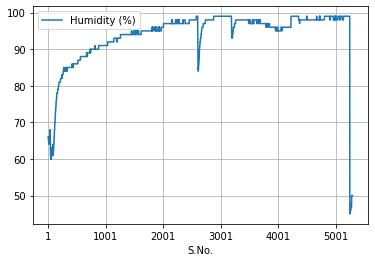

In [ ]:
df.plot(grid=True, x='S.No.', y='Humidity (%)', kind='line')

In [ ]:
#df.drop('time', axis=1, inplace = True)

In [ ]:
df = df.reset_index(drop=True)
df.head()

,S.No.,Date,Time,Temperature (°C),Humidity (%)
0,1,2021-10-12,4:46:21 PM,26,66
1,2,2021-10-12,4:46:30 PM,26,66
2,3,2021-10-12,4:46:58 PM,26,66
3,4,2021-10-12,4:47:04 PM,26,65
4,5,2021-10-12,4:47:08 PM,26,65


In [ ]:
time_ampm = df['Time'].str.split(' ', n = 2, expand = True)
time_ampm.loc[time_ampm[1] == 'PM', 'New_Time'] = time_ampm[0] + ":" + "01"
time_ampm.loc[time_ampm[1] == 'AM', 'New_Time'] = time_ampm[0] + ":" + "02"
time_ampm_new = time_ampm['New_Time'].str.split(':', expand = True)
time_ampm = time_ampm_new[0] + time_ampm_new[1] + time_ampm_new[3]

date_division = df['Date'].astype(str).str.split('-', expand=True)
date_division = date_division[0]+date_division[1]+date_division[2]

df['datetime_sort_ref'] = (date_division + time_ampm).astype(int)
df['dates'] = df['Date'].astype(str)+ " " + df['Time'].astype(str)
df['dates'] = pd.to_datetime(df['dates'])
df.head()

,S.No.,Date,Time,Temperature (°C),Humidity (%),datetime_sort_ref,dates
0,1,2021-10-12,4:46:21 PM,26,66,2021101244601,2021-10-12 16:46:21
1,2,2021-10-12,4:46:30 PM,26,66,2021101244601,2021-10-12 16:46:30
2,3,2021-10-12,4:46:58 PM,26,66,2021101244601,2021-10-12 16:46:58
3,4,2021-10-12,4:47:04 PM,26,65,2021101244701,2021-10-12 16:47:04
4,5,2021-10-12,4:47:08 PM,26,65,2021101244701,2021-10-12 16:47:08


In [ ]:
# new = df['Time'].str.split(":", n = 2, expand = True)
# df['hr_min'] = new[0] + ':' + new[1]
# df['sort_ref'] = (new[0] + '.' + new[1]).astype(float)
# ##df['hr_min'] = df['Time'].str[:4]
# ##df['min'] = new[1]
# ##df['sec'] = new[2]
# df.head()
datetemp = df.copy(deep=True)
datetemp.drop('Time', axis=1, inplace = True)
datetemp.drop('Date', axis=1, inplace = True)
datetemp.drop('datetime_sort_ref', axis=1, inplace = True)
datetemp.drop('S.No.', axis=1, inplace = True)
datetemp.head()

,Temperature (°C),Humidity (%),dates
0,26,66,2021-10-12 16:46:21
1,26,66,2021-10-12 16:46:30
2,26,66,2021-10-12 16:46:58
3,26,65,2021-10-12 16:47:04
4,26,65,2021-10-12 16:47:08


In [ ]:
#df=df.groupby('date').agg({'value':'mean'})

In [ ]:
df=df.groupby('datetime_sort_ref').agg({'Temperature (°C)': 'mean', 'Humidity (%)': 'mean'})
df

,Temperature (°C),Humidity (%)
datetime_sort_ref,,
2021101244601,26.000000,66.000000
2021101244701,26.181818,65.181818
2021101244801,27.083333,64.666667
2021101244901,27.363636,65.000000
2021101245001,27.000000,60.583333
...,...,...
20211013125502,14.000000,99.000000
20211013125602,14.000000,99.000000
20211013125702,14.000000,99.000000


In [ ]:
# df.sort_values(by='date_time', inplace=True)
df.reset_index(inplace = True, drop = False)
df.head()

,datetime_sort_ref,Temperature (°C),Humidity (%)
0,2021101244601,26.000000,66.000000
1,2021101244701,26.181818,65.181818
2,2021101244801,27.083333,64.666667
3,2021101244901,27.363636,65.000000
4,2021101245001,27.000000,60.583333


In [ ]:
# datetemp = df.copy(deep=True)

In [ ]:
datetiming = df['datetime_sort_ref'].astype(str)
year = datetiming.str[0:4]
month = datetiming.str[4:6]
day = datetiming.str[6:8]
hr = datetiming.str[8:-4]
min = datetiming.str[-4:-2]
Z = datetiming.str[-2:]
Z.loc[Z == '01'] = "PM"
Z.loc[Z == '02'] = "AM"

df['date_time'] = year +"/"+ month + "/" + day + " " + hr + ":" + min + " " + Z 
df['date_time'] = pd.to_datetime(df['date_time']).astype(str).str[:-3]
df.head()


,datetime_sort_ref,Temperature (°C),Humidity (%),date_time
0,2021101244601,26.000000,66.000000,2021-10-12 16:46
1,2021101244701,26.181818,65.181818,2021-10-12 16:47
2,2021101244801,27.083333,64.666667,2021-10-12 16:48
3,2021101244901,27.363636,65.000000,2021-10-12 16:49
4,2021101245001,27.000000,60.583333,2021-10-12 16:50


In [ ]:
datetemp_mean = df.copy(deep=True)
datetemp_mean.drop('datetime_sort_ref', axis=1, inplace = True)
datetemp_mean['date_time'] = datetemp_mean['date_time']
datetemp_mean

,Temperature (°C),Humidity (%),date_time
0,26.000000,66.000000,2021-10-12 16:46
1,26.181818,65.181818,2021-10-12 16:47
2,27.083333,64.666667,2021-10-12 16:48
3,27.363636,65.000000,2021-10-12 16:49
4,27.000000,60.583333,2021-10-12 16:50
...,...,...,...
440,14.000000,99.000000,2021-10-13 00:55
441,14.000000,99.000000,2021-10-13 00:56
442,14.000000,99.000000,2021-10-13 00:57
443,14.000000,99.000000,2021-10-13 00:58


In [ ]:
df.set_index(df['date_time'],inplace = True)

In [ ]:
# df.drop('hr_min', axis=1, inplace=True)
# df.drop('sort_ref', axis=1, inplace=True)
df.drop('datetime_sort_ref', axis=1, inplace=True)
df.drop('date_time', axis=1, inplace=True)
df.head()

,Temperature (°C),Humidity (%)
date_time,,
2021-10-12 16:46,26.000000,66.000000
2021-10-12 16:47,26.181818,65.181818
2021-10-12 16:48,27.083333,64.666667
2021-10-12 16:49,27.363636,65.000000
2021-10-12 16:50,27.000000,60.583333


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445 entries, 2021-10-12 16:46 to 2021-10-13 00:59
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature (°C)  445 non-null    float64
 1   Humidity (%)      445 non-null    float64
dtypes: float64(2)
memory usage: 10.4+ KB


In [ ]:
df.describe()

,Temperature (°C),Humidity (%)
count,445.000000,445.000000
mean,16.234199,92.740753
std,2.939894,10.194638
min,14.000000,45.200000
25%,15.000000,92.000000
50%,15.000000,96.285714
75%,17.000000,98.000000
max,32.000000,99.000000


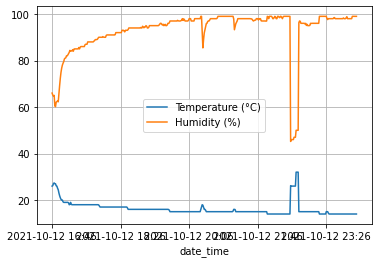

In [ ]:
df.plot(grid=True)

In [ ]:
df.head()

,Temperature (°C),Humidity (%)
date_time,,
2021-10-12 16:46,26.000000,66.000000
2021-10-12 16:47,26.181818,65.181818
2021-10-12 16:48,27.083333,64.666667
2021-10-12 16:49,27.363636,65.000000
2021-10-12 16:50,27.000000,60.583333


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/iotespml_save.csv')

# ***Graph of data after transformation***

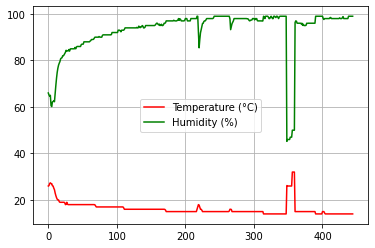

In [ ]:
#from pandas import pd
from matplotlib import pyplot
series = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iotespml_save.csv',header=0)
series.plot(style=['red', 'green'], legend = True, grid = True)
pyplot.show()

In [ ]:
df.reset_index(inplace=True)
df.head()

,date_time,Temperature (°C),Humidity (%)
0,2021-10-12 16:46,26.000000,66.000000
1,2021-10-12 16:47,26.181818,65.181818
2,2021-10-12 16:48,27.083333,64.666667
3,2021-10-12 16:49,27.363636,65.000000
4,2021-10-12 16:50,27.000000,60.583333


In [ ]:
df['Year'] = pd.to_datetime(df['date_time']).dt.year
df['Month'] = pd.to_datetime(df['date_time']).dt.month
df['Day'] = pd.to_datetime(df['date_time']).dt.day
df['Hr'] = pd.to_datetime(df['date_time']).dt.hour
df['Min'] = pd.to_datetime(df['date_time']).dt.minute
df

,date_time,Temperature (°C),Humidity (%),Year,Month,Day,Hr,Min
0,2021-10-12 16:46,26.000000,66.000000,2021,10,12,16,46
1,2021-10-12 16:47,26.181818,65.181818,2021,10,12,16,47
2,2021-10-12 16:48,27.083333,64.666667,2021,10,12,16,48
3,2021-10-12 16:49,27.363636,65.000000,2021,10,12,16,49
4,2021-10-12 16:50,27.000000,60.583333,2021,10,12,16,50
...,...,...,...,...,...,...,...,...
440,2021-10-13 00:55,14.000000,99.000000,2021,10,13,0,55
441,2021-10-13 00:56,14.000000,99.000000,2021,10,13,0,56
442,2021-10-13 00:57,14.000000,99.000000,2021,10,13,0,57
443,2021-10-13 00:58,14.000000,99.000000,2021,10,13,0,58


In [ ]:
# df['year'] = pd.to_datetime(df['date']).dt.year
# df['month'] = pd.to_datetime(df['date']).dt.month
# df['day'] = pd.to_datetime(df['date']).dt.day
df.drop('date_time', axis = 1, inplace = True)

In [ ]:
df = df[['Year', 'Month', 'Day', 'Hr', 'Min', 'Temperature (°C)',	'Humidity (%)']]
df

,Year,Month,Day,Hr,Min,Temperature (°C),Humidity (%)
0,2021,10,12,16,46,26.000000,66.000000
1,2021,10,12,16,47,26.181818,65.181818
2,2021,10,12,16,48,27.083333,64.666667
3,2021,10,12,16,49,27.363636,65.000000
4,2021,10,12,16,50,27.000000,60.583333
...,...,...,...,...,...,...,...
440,2021,10,13,0,55,14.000000,99.000000
441,2021,10,13,0,56,14.000000,99.000000
442,2021,10,13,0,57,14.000000,99.000000
443,2021,10,13,0,58,14.000000,99.000000


In [ ]:
target = np.array(df[['Temperature (°C)',	'Humidity (%)']])

df.drop(['Temperature (°C)',	'Humidity (%)'], axis = 1, inplace = True)
feature_list = list(target)
features = np.array(df)

# ***Initiate the Learning***

In [ ]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, target, test_size = 0.25, random_state=42)


In [ ]:
print('Training features shape', train_features.shape)

print('Training labels shape', train_labels.shape)

print('Testing features shape', test_features.shape)

print('Training labels shape', test_labels.shape)


Training features shape (333, 5)
Training labels shape (333, 2)
Testing features shape (112, 5)
Training labels shape (112, 2)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000)

rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000)

## **Check Accuracy**

In [ ]:
prediction = rf.predict(test_features)

errors = abs(prediction - test_labels)

print('Mean Absolute Error', round(np.mean(errors),2), 'degress.')

mape = 100*(errors/test_labels)

accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(accuracy,2), '%.')


a = [np.array([2021,12,i,12,24]) for i in range(15,25)]
arr = rf.predict(a)



Mean Absolute Error 0.23 degress.
Accuracy:  99.56 %.


## **Prediction**

In [ ]:
print('    Date           Time       Temperature    Humidity')
for i in range(len(a)):  
  print(a[i][0],'/',a[i][1],'/',a[i][2], ' ', a[i][3], ':', a[i][4], ' --> ', round(arr[i][0],2), '°F       ', round(arr[i][1]), '%')

    Date           Time       Temperature    Humidity
2021 / 12 / 15   12 : 24  -->  30.99 °F        49 %
2021 / 12 / 16   12 : 24  -->  30.99 °F        49 %
2021 / 12 / 17   12 : 24  -->  30.99 °F        49 %
2021 / 12 / 18   12 : 24  -->  30.99 °F        49 %
2021 / 12 / 19   12 : 24  -->  30.99 °F        49 %
2021 / 12 / 20   12 : 24  -->  30.99 °F        49 %
2021 / 12 / 21   12 : 24  -->  30.99 °F        49 %
2021 / 12 / 22   12 : 24  -->  30.99 °F        49 %
2021 / 12 / 23   12 : 24  -->  30.99 °F        49 %
2021 / 12 / 24   12 : 24  -->  30.99 °F        49 %


## **Call anvil Web-app**

In [ ]:
@anvil.server.callable
def predict_iris(year, month, day, hour, minute):
  pred = rf.predict(np.array([year, month, day, hour, minute]).reshape(1,5))
  return round(pred[0][0],2), round(pred[0][1], 2)

In [ ]:
datetemp_mean.head()

,Temperature (°C),Humidity (%),date_time
0,26.000000,66.000000,2021-10-12 16:46
1,26.181818,65.181818,2021-10-12 16:47
2,27.083333,64.666667,2021-10-12 16:48
3,27.363636,65.000000,2021-10-12 16:49
4,27.000000,60.583333,2021-10-12 16:50


In [ ]:
pred_date = '2021-10-12 10:20'

# user_date = datetime.strptime(pred_date,'%Y-%m-%d').date()
# print(user_date)

datetemp_mean[datetemp_mean['date_time'] == pred_date]

,Temperature (°C),Humidity (%),date_time


In [ ]:
anvil.server.wait_forever() 

KeyboardInterrupt: ignored